# Logistic Regression Prediction1. The trained model weights and the test dataset are loaded from CSV files.
2. The test dataset is filtered to include only the selected features used in training the model. The data is then standardized, and missing values are replaced with 0.
3. The model predicts the probabilities of each student belonging to each Hogwarts house using the trained model weights. Maximum Likelihood Estimation (MLE) is also calculated.
4. A heatmap is plotted to visualize the predicted probabilities of each student belonging to each Hogwarts house.
5. The predicted Hogwarts house for each student is saved to a CSV file with the corresponding index.

Trained model loaded successfully.
Standardizing features.
Test database loaded successfully.


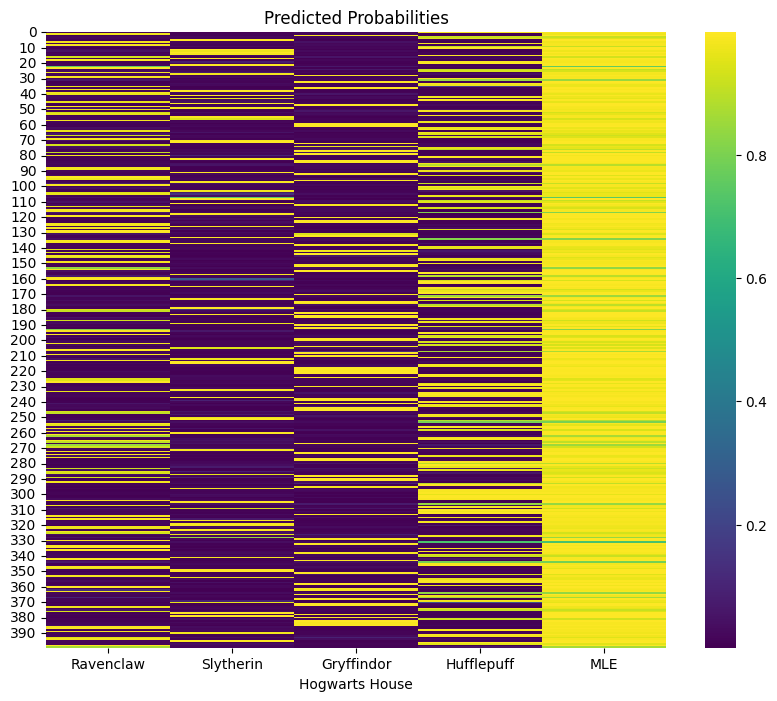

Predictions saved successfully.


In [40]:
import numpy as np
import seaborn

%run "utils.ipynb"

# File paths
MODEL_WEIGHTS_FILE = 'trained_model.csv'
DATASET_TEST_FILE = './datasets/dataset_test.csv'

# Load trained model from the CSV file
trained_model = pd.read_csv(MODEL_WEIGHTS_FILE)
selected_features_labels = trained_model.columns[0]
selected_features = trained_model[selected_features_labels].to_list()[:-1]
print("Trained model loaded successfully.")

# Load test dataset from the CSV file
test_dataset = pd.read_csv(DATASET_TEST_FILE)
# Filter only selected featueres
test_dataset = test_dataset [selected_features]

# Standardize data and replace NaNs by 0
print("Standardizing features.")
standardized_test_dataset = test_dataset.apply(lambda x: (x - x.mean()) / x.std())
standardized_test_dataset.fillna(0, inplace=True)
print("Test database loaded successfully.")

# Prepare datasets for dot product
X = np.array(df_std_test)
ones = np.ones((len(X), 1), dtype=float)
# Add a column of 1s on the RIGHT
X = np.concatenate((X, ones), axis=1)

# Convert weights to numpy array
W = np.array(trained_model.drop(columns=selected_features_labels))

def sigmoid(arr: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-arr))

# Get Hogwarts house labels
houses = trained_model.columns[1:].to_list()

# Calculate probabilities and Maximum Likelihood Estimation
z = np.dot(X, W)
probabilities = pd.DataFrame(sigmoid(z), columns=houses)
probabilities['MLE'] = probabilities.max(axis=1)

# Plot heatmap
plt.figure(figsize=(10, 8))
seaborn.heatmap(probabilities, cmap='viridis', cbar=True)
plt.xlabel("Hogwarts House")
plt.title("Predicted Probabilities")
plt.show()
# Get predicted Hogwarts house
probabilities['Hogwarts House'] = probabilities.idxmax(axis=1)
probabilities.head()

# Saving to file
try:
    probabilities[['Hogwarts House']].to_csv('houses.csv', index_label='Index')
    print("Predictions saved successfully.")
except Exception as e:
    print("Error occurred while saving the predictions:", e)